CUSTOMER SHOPPING TRENDS DATASET

In [ ]:

!pip install Faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
fake = Faker()

def generate_comprehensive_dataset(num_records=1500):
    # Predefined lists for realistic data generation
    categories = [
        'Electronics', 'Clothing', 'Footwear', 'Accessories',
        'Home Decor', 'Sports', 'Beauty', 'Books', 'Jewelry'
    ]
    locations = [
        'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
        'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose'
    ]
    shipping_types = ['Standard', 'Express', 'Next Day', 'Free Shipping']
    payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer', 'Cash']
    colors = ['Red', 'Blue', 'Green', 'Black', 'White', 'Yellow', 'Purple', 'Gray']
    seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
    sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL']
    purchase_frequencies = ['Weekly', 'Fortnightly', 'Monthly']

    # Prepare dataset
    data = []
    for _ in range(num_records):
        # Null value probabilities
        null_probabilities = {
            'Item Purchased': 0.15,
            'Review Rating': 0.20,
            'Shipping Type': 0.10,
            'Size': 0.12,
            'Color': 0.15,
            'Payment Method': 0.08
        }

        # Basic customer information with potential null values
        age = np.random.randint(18, 75)
        if np.random.random() < 0.05:  # 5% chance of null age
            age = None

        gender = np.random.choice(['Male', 'Female'])
        if np.random.random() < 0.07:  # 7% chance of null gender
            gender = None

        # Shopping details with null possibilities
        category = np.random.choice(categories)

        # Purchase amount with potential outliers and nulls
        purchase_amount = round(np.random.uniform(10, 500), 2)
        if np.random.random() < 0.05:  # 5% chance of null purchase amount
            purchase_amount = None
        elif np.random.random() < 0.03:  # 3% chance of extreme outliers
            purchase_amount *= np.random.choice([0.1, 10])  # Very low or very high amounts

        location = np.random.choice(locations)

        # Frequency of purchase
        frequency_of_purchases = np.random.choice(
            purchase_frequencies,
            p=[0.4, 0.3, 0.3]
        )

        # Construct row with potential null values
        row = {
            'Customer ID': fake.unique.uuid4(),
            'Age': age,
            'Gender': gender,
            'Item Purchased': (fake.word() if np.random.random() > null_probabilities['Item Purchased'] else None),
            'Category': category,
            'Purchase Amount (USD)': purchase_amount,
            'Location': location,
            'Size': (np.random.choice(sizes) if np.random.random() > null_probabilities['Size'] else None),
            'Color': (np.random.choice(colors) if np.random.random() > null_probabilities['Color'] else None),
            'Season': np.random.choice(seasons),
            'Review Rating': (round(np.random.uniform(1, 5), 1) if np.random.random() > null_probabilities['Review Rating'] else None),
            'Shipping Type': (np.random.choice(shipping_types) if np.random.random() > null_probabilities['Shipping Type'] else None),
            'Payment Method': (np.random.choice(payment_methods) if np.random.random() > null_probabilities['Payment Method'] else None),
            'Previous Purchases': np.random.randint(0, 50),
            'Frequency of Purchases': frequency_of_purchases
        }

        data.append(row)

    # Create DataFrame
    df = pd.DataFrame(data)

    # DUPLICATE GENERATION STRATEGIES
    # 1. Exact Duplicates
    num_exact_duplicates = int(len(df) * 0.08)  # 8% exact duplicates
    duplicate_indices = np.random.choice(df.index, num_exact_duplicates, replace=False)
    duplicates_df = df.loc[duplicate_indices].copy()
    df = pd.concat([df, duplicates_df], ignore_index=True)

    # 2. Partial Duplicates with Variations
    num_partial_duplicates = int(len(df) * 0.06)  # 6% partial duplicates
    partial_duplicates = []

    for _ in range(num_partial_duplicates):
        # Select a base row to create partial duplicate
        base_row = df.sample(1).iloc[0].copy()

        # Introduce variations
        variation_columns = ['Purchase Amount (USD)', 'Age', 'Previous Purchases']
        for col in variation_columns:
            if base_row[col] is not None:
                base_row[col] += np.random.uniform(-20, 20)

        # Randomize some categorical columns
        categorical_columns = ['Location', 'Shipping Type', 'Payment Method']
        for col in categorical_columns:
            base_row[col] = np.random.choice(df[col].dropna().unique())

        partial_duplicates.append(base_row)

    # Add partial duplicates
    if partial_duplicates:
        partial_duplicates_df = pd.DataFrame(partial_duplicates)
        df = pd.concat([df, partial_duplicates_df], ignore_index=True)

    # OUTLIER GENERATION
    # Numerical columns for outlier generation
    numerical_columns = ['Purchase Amount (USD)', 'Age', 'Previous Purchases']

    # Generate outliers for each numerical column
    for col in numerical_columns:
        # Skip if column has significant null values
        if df[col].isnull().sum() / len(df) > 0.3:
            continue

        # Calculate column statistics
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Generate outliers
        num_outliers = int(len(df) * 0.03)  # 3% outliers
        for _ in range(num_outliers):
            # Create extreme values (beyond 3 standard deviations)
            extreme_value = col_mean + np.random.choice([-1, 1]) * col_std * np.random.uniform(3, 5)

            # Create a row based on existing data
            outlier_row = df.sample(1).iloc[0].copy()
            outlier_row[col] = extreme_value

            # Add to dataframe
            df = pd.concat([df, pd.DataFrame([outlier_row])], ignore_index=True)

    return df

# Generate the comprehensive dataset
customer_shopping_trends = generate_comprehensive_dataset(1500)

# Save to CSV
customer_shopping_trends.to_csv('comprehensive_customer_shopping_trends.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
customer_shopping_trends = pd.read_csv('comprehensive_customer_shopping_trends.csv')

# Display information about the dataset
print(customer_shopping_trends.info())

# Display data types of each column
print("\nData Types:")
print(customer_shopping_trends.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1875 non-null   object 
 1   Age                     1801 non-null   float64
 2   Gender                  1739 non-null   object 
 3   Item Purchased          1620 non-null   object 
 4   Category                1875 non-null   object 
 5   Purchase Amount (USD)   1763 non-null   float64
 6   Location                1875 non-null   object 
 7   Size                    1664 non-null   object 
 8   Color                   1565 non-null   object 
 9   Season                  1875 non-null   object 
 10  Review Rating           1507 non-null   float64
 11  Shipping Type           1706 non-null   object 
 12  Payment Method          1756 non-null   object 
 13  Previous Purchases      1875 non-null   float64
 14  Frequency of Purchases  1875 non-null   

TRAINING AND TESTING THE DATASET USING XGBOOST WITHOUT ANY DATA PREPROCESSING


Missing values in the dataset:


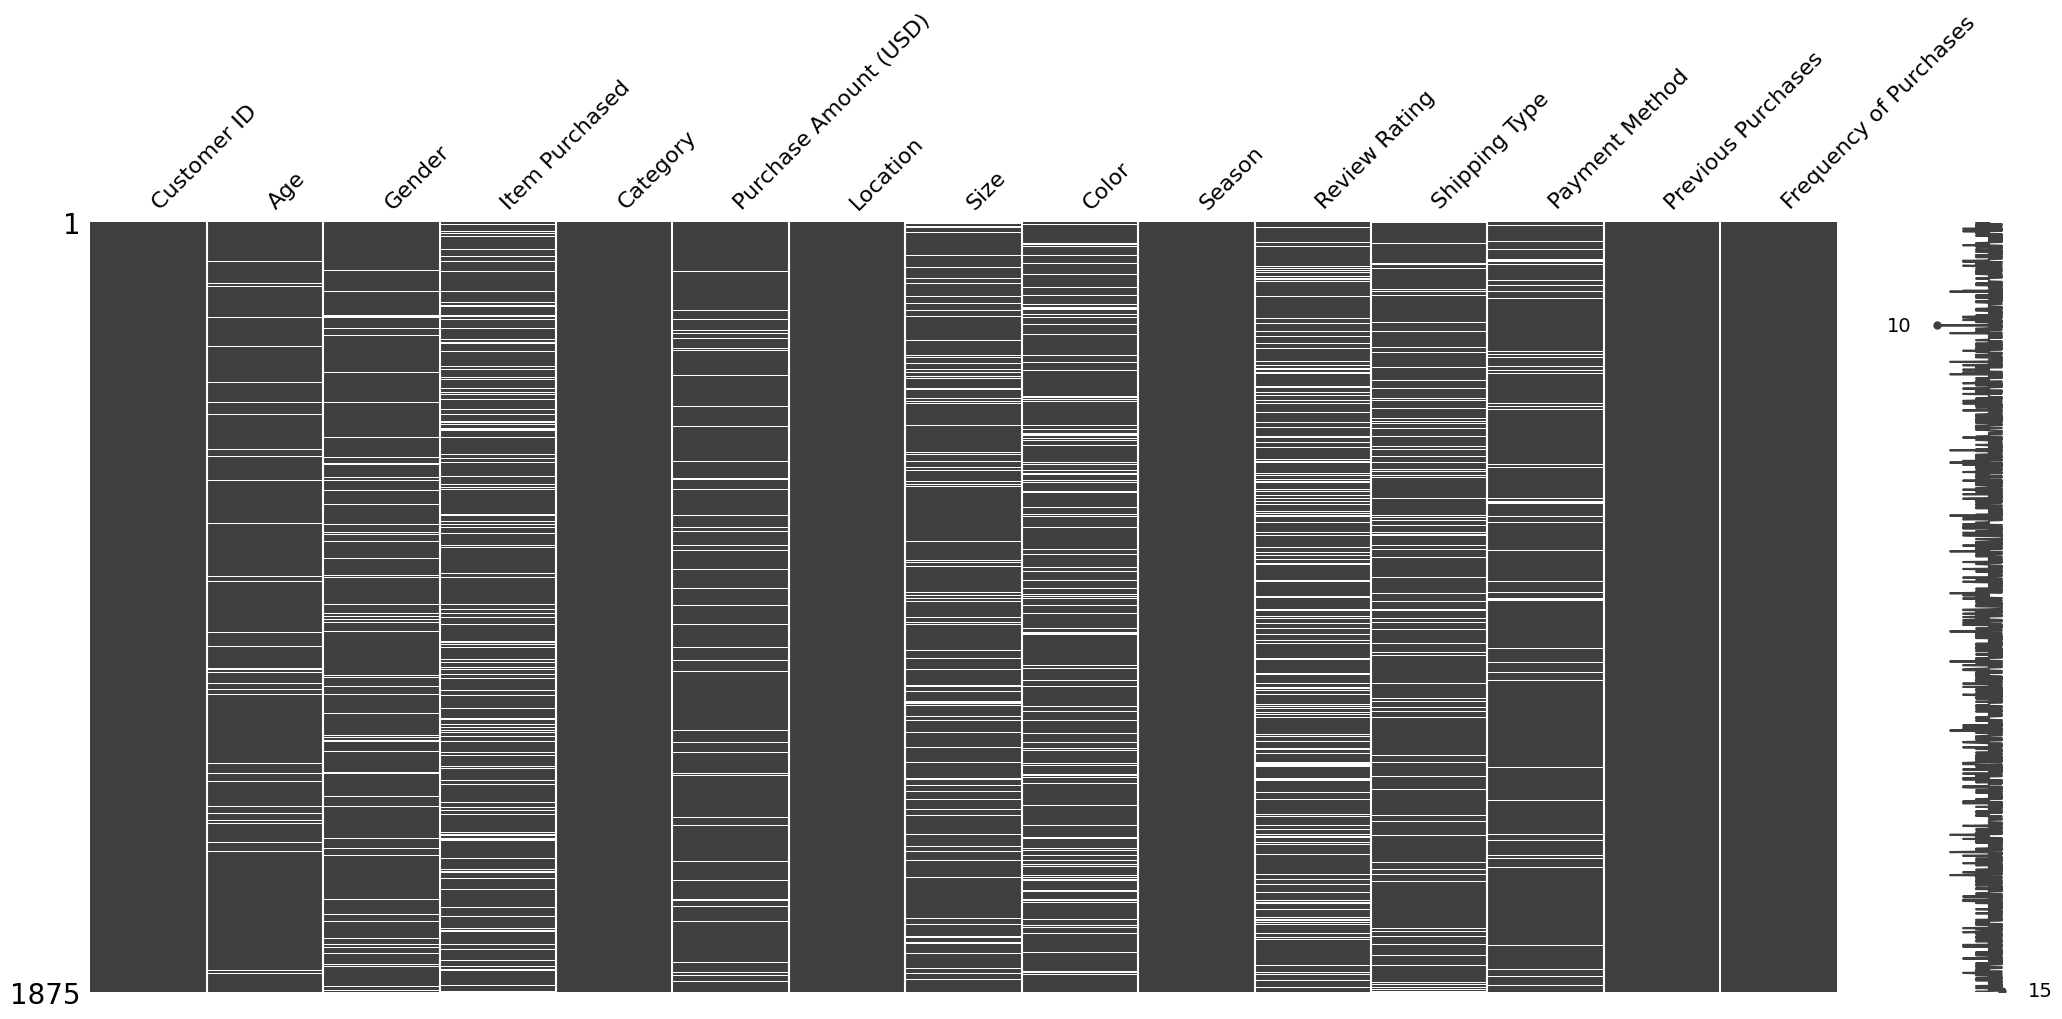

Non-numeric columns in features (X): Index(['Item Purchased'], dtype='object')
Accuracy: 0.4640
Classification Report:
              precision    recall  f1-score   support

      Weekly       0.50      0.56      0.53       154
 Fortnightly       0.40      0.36      0.38       111
     Monthly       0.46      0.43      0.44       110

    accuracy                           0.46       375
   macro avg       0.45      0.45      0.45       375
weighted avg       0.46      0.46      0.46       375



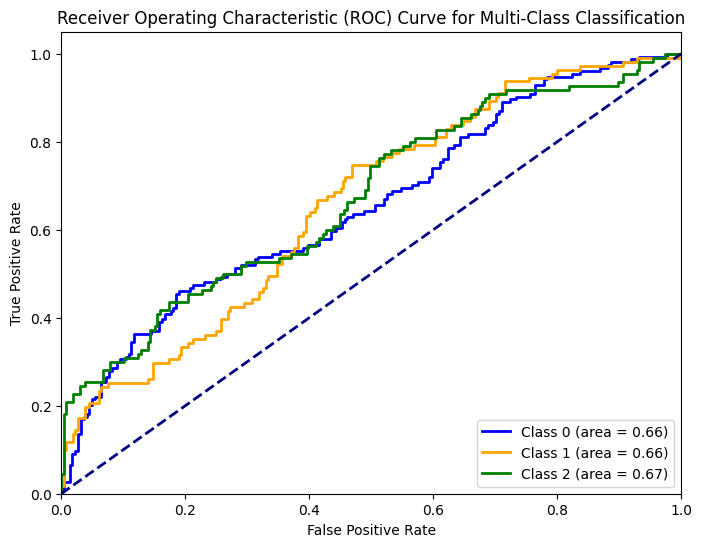

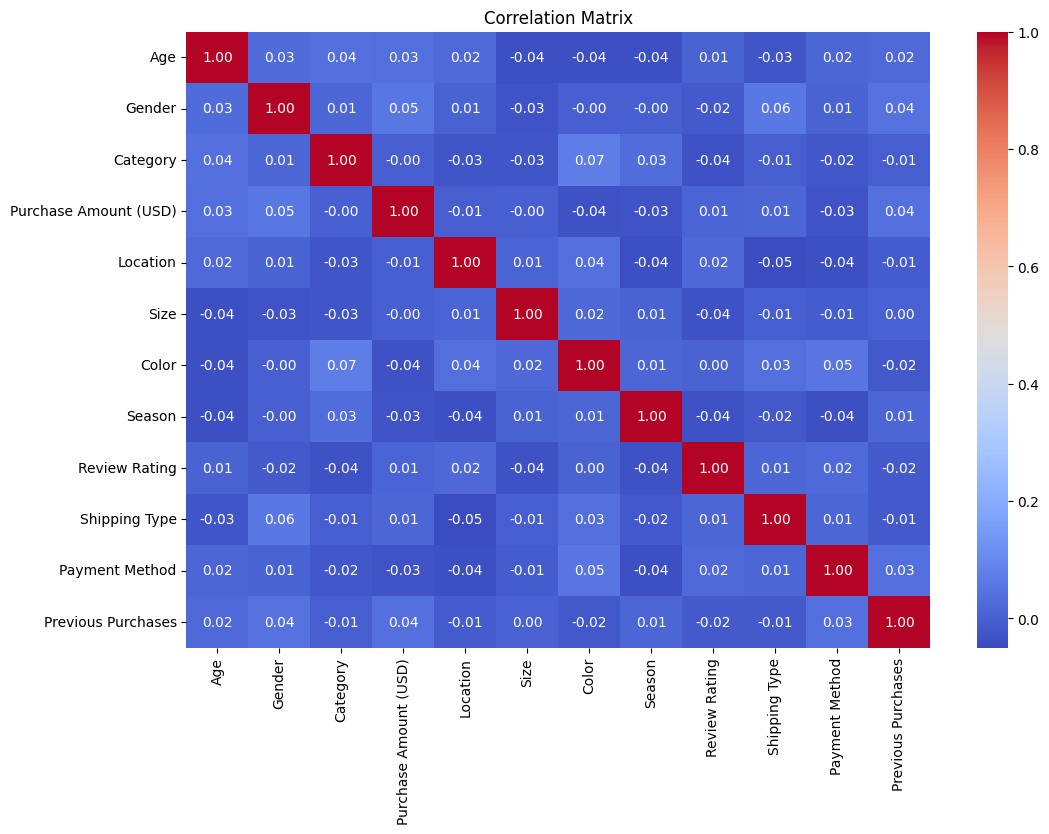

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelBinarizer

# Load the dataset
customer_shopping_trends = pd.read_csv('comprehensive_customer_shopping_trends.csv')

# Check for non-numeric columns and replace 'forget' (or other invalid values) with NaN
customer_shopping_trends.replace('forget', np.nan, inplace=True)

# Check for missing values using missingno
print("Missing values in the dataset:")
msno.matrix(customer_shopping_trends)
plt.show()

# Convert categorical variables to numeric using label encoding or one-hot encoding
categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Payment Method']

# Using label encoding for categorical columns
for col in categorical_columns:
    customer_shopping_trends[col] = customer_shopping_trends[col].astype('category').cat.codes

# Target variable 'Frequency of Purchases' (0: Weekly, 1: Fortnightly, 2: Monthly)
target_mapping = {'Weekly': 0, 'Fortnightly': 1, 'Monthly': 2}

# Mapping the target variable
customer_shopping_trends['Frequency of Purchases'] = customer_shopping_trends['Frequency of Purchases'].map(target_mapping)

# Handle missing values in the target variable (fill NaN with a default value or drop rows)
customer_shopping_trends['Frequency of Purchases'].fillna(0, inplace=True)

# Features and target separation
X = customer_shopping_trends.drop(columns=['Customer ID', 'Frequency of Purchases'])
y = customer_shopping_trends['Frequency of Purchases']

# Check for non-numeric columns in features (X)
print("Non-numeric columns in features (X):", X.select_dtypes(include=['object']).columns)

# Convert any remaining non-numeric columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')  # This will convert any non-numeric columns to NaN

# Drop the 'Item Purchased' column from the features (X) before calculating the correlation matrix
X = X.drop(columns=['Item Purchased'], errors='ignore')

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
xg_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xg_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = xg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Weekly', 'Fortnightly', 'Monthly']))

# ROC-AUC Curve for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_prob = xg_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for all classes
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(len(lb.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {lb.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

# Correlation Matrix excluding 'Item Purchased'
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


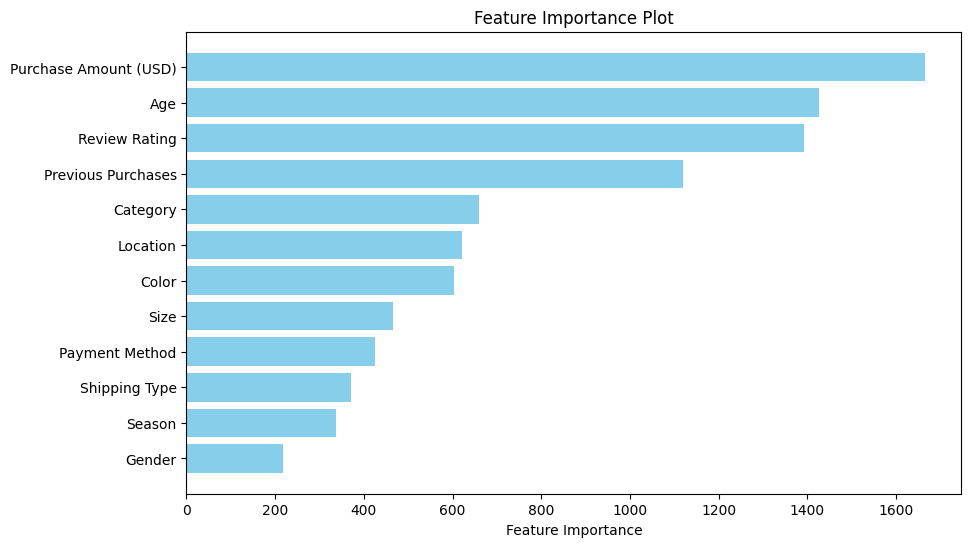

In [ ]:
# Feature Importance Plot
def plot_feature_importance(model, feature_names):
    # Get the feature importance (can also use 'gain' or 'cover' depending on what you prefer)
    feature_importance = model.get_booster().get_score(importance_type='weight')  # You can change 'weight' to 'gain' or 'cover'

    # Sort the features by importance
    sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    # Unzip the sorted importance
    features, importance_scores = zip(*sorted_feature_importance)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance_scores, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance Plot')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.show()

# Plot feature importance after training the model
plot_feature_importance(xg_clf, X.columns)

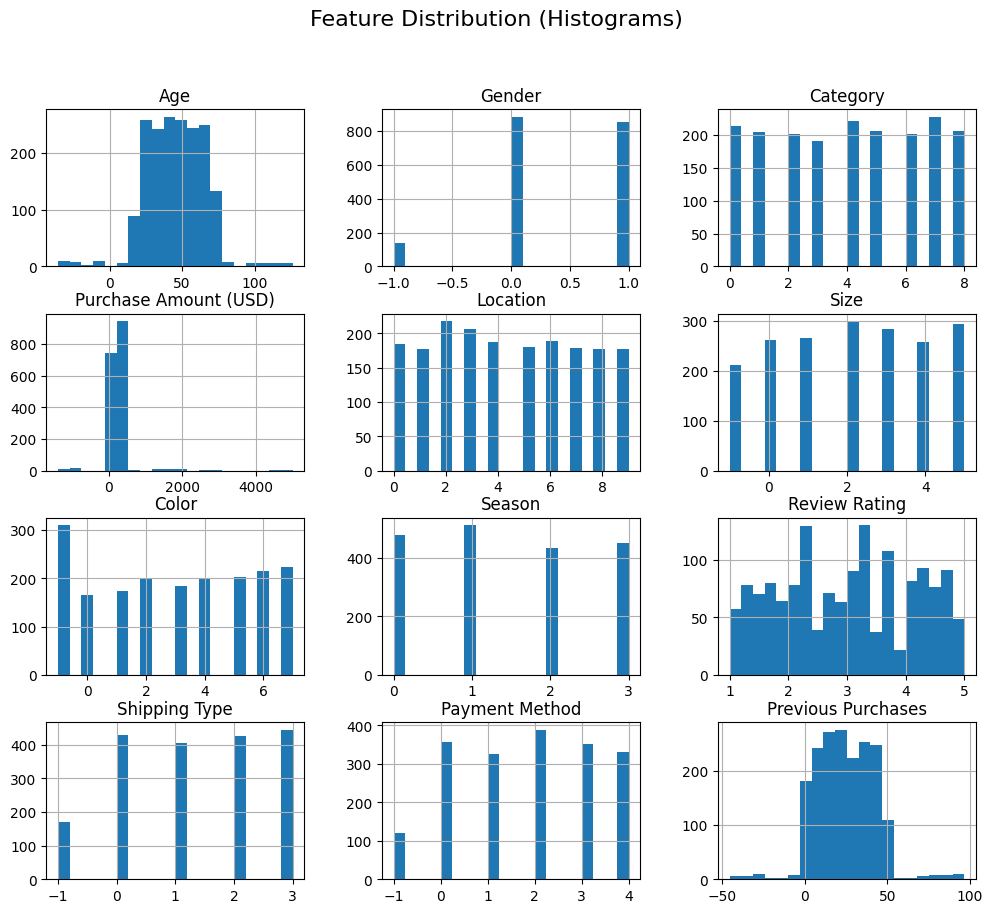

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelBinarizer

# Visualize the distribution of features using histograms
X.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distribution (Histograms)', fontsize=16)
plt.show()


In [ ]:
import pandas as pd

# Function to identify outliers using the IQR method
def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for outliers
columns_to_check = ['Purchase Amount (USD)', 'Age', 'Previous Purchases']

# Loop through columns and check for outliers
for column in columns_to_check:
    outliers = check_outliers(customer_shopping_trends, column)
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")

    print("-" * 50)


Column: Purchase Amount (USD)
Number of outliers: 72
--------------------------------------------------
Column: Age
Number of outliers: 0
--------------------------------------------------
Column: Previous Purchases
Number of outliers: 44
--------------------------------------------------


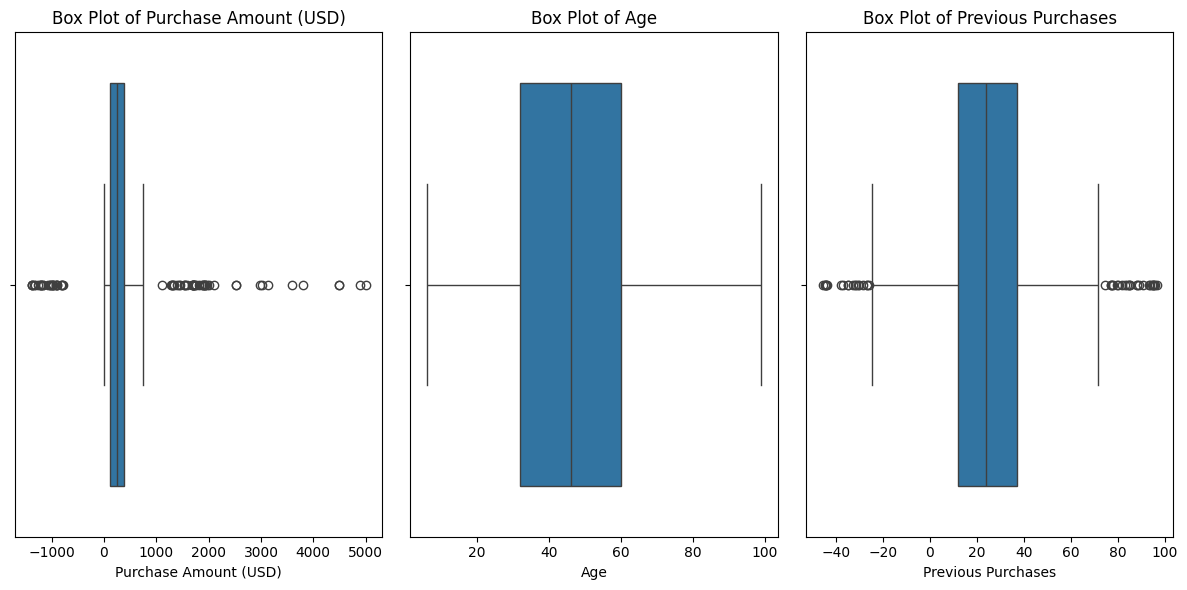

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# List of columns to plot box plots for
columns_to_plot = ['Purchase Amount (USD)', 'Age', 'Previous Purchases']

# Create box plots for each of the columns
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, index starting from 1
    sns.boxplot(data=customer_shopping_trends, x=column)
    plt.title(f'Box Plot of {column}')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


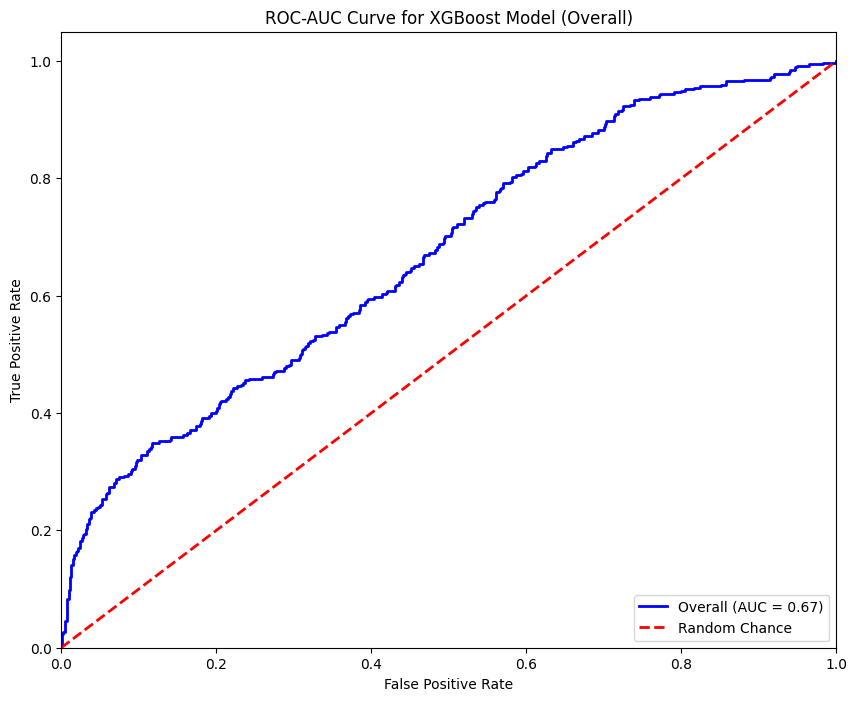

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the overall ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_micro, tpr_micro, color='blue', lw=2, label=f'Overall (AUC = {roc_auc_micro:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Chance')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for XGBoost Model (Overall)')
plt.legend(loc="lower right")

# Show the plot
plt.show()


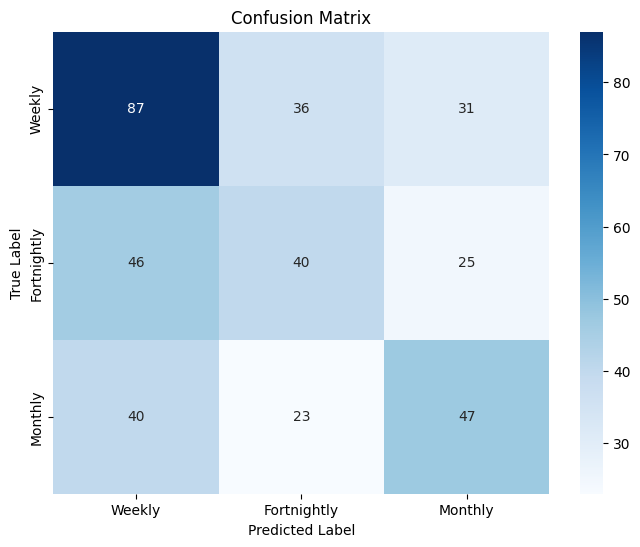

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Weekly', 'Fortnightly', 'Monthly'], yticklabels=['Weekly', 'Fortnightly', 'Monthly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Dropping exact duplicates
customer_shopping_trends.drop_duplicates(inplace=True)

# Check and handle partial duplicates (those with small variations)
# You may decide to remove rows where certain columns are nearly identical, with variations being too small
customer_shopping_trends['Purchase Amount (USD)'] = customer_shopping_trends['Purchase Amount (USD)'].round(2)  # Round to handle minor variations
customer_shopping_trends.drop_duplicates(subset=['Purchase Amount (USD)', 'Age', 'Previous Purchases'], keep='first', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1875 non-null   object 
 1   Age                     1801 non-null   float64
 2   Gender                  1739 non-null   object 
 3   Item Purchased          1620 non-null   object 
 4   Category                1875 non-null   object 
 5   Purchase Amount (USD)   1763 non-null   float64
 6   Location                1875 non-null   object 
 7   Size                    1664 non-null   object 
 8   Color                   1565 non-null   object 
 9   Season                  1875 non-null   object 
 10  Review Rating           1507 non-null   float64
 11  Shipping Type           1706 non-null   object 
 12  Payment Method          1756 non-null   object 
 13  Previous Purchases      1875 non-null   float64
 14  Frequency of Purchases  1875 non-null   

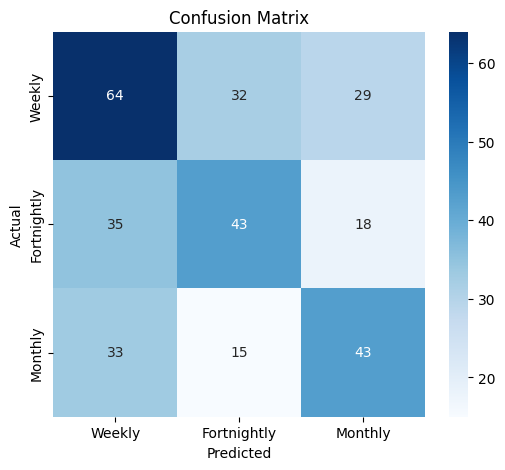

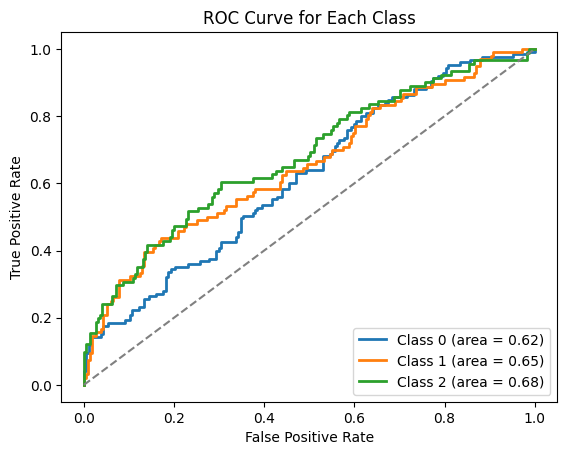

Classification Report:
              precision    recall  f1-score   support

      Weekly       0.48      0.51      0.50       125
 Fortnightly       0.48      0.45      0.46        96
     Monthly       0.48      0.47      0.48        91

    accuracy                           0.48       312
   macro avg       0.48      0.48      0.48       312
weighted avg       0.48      0.48      0.48       312



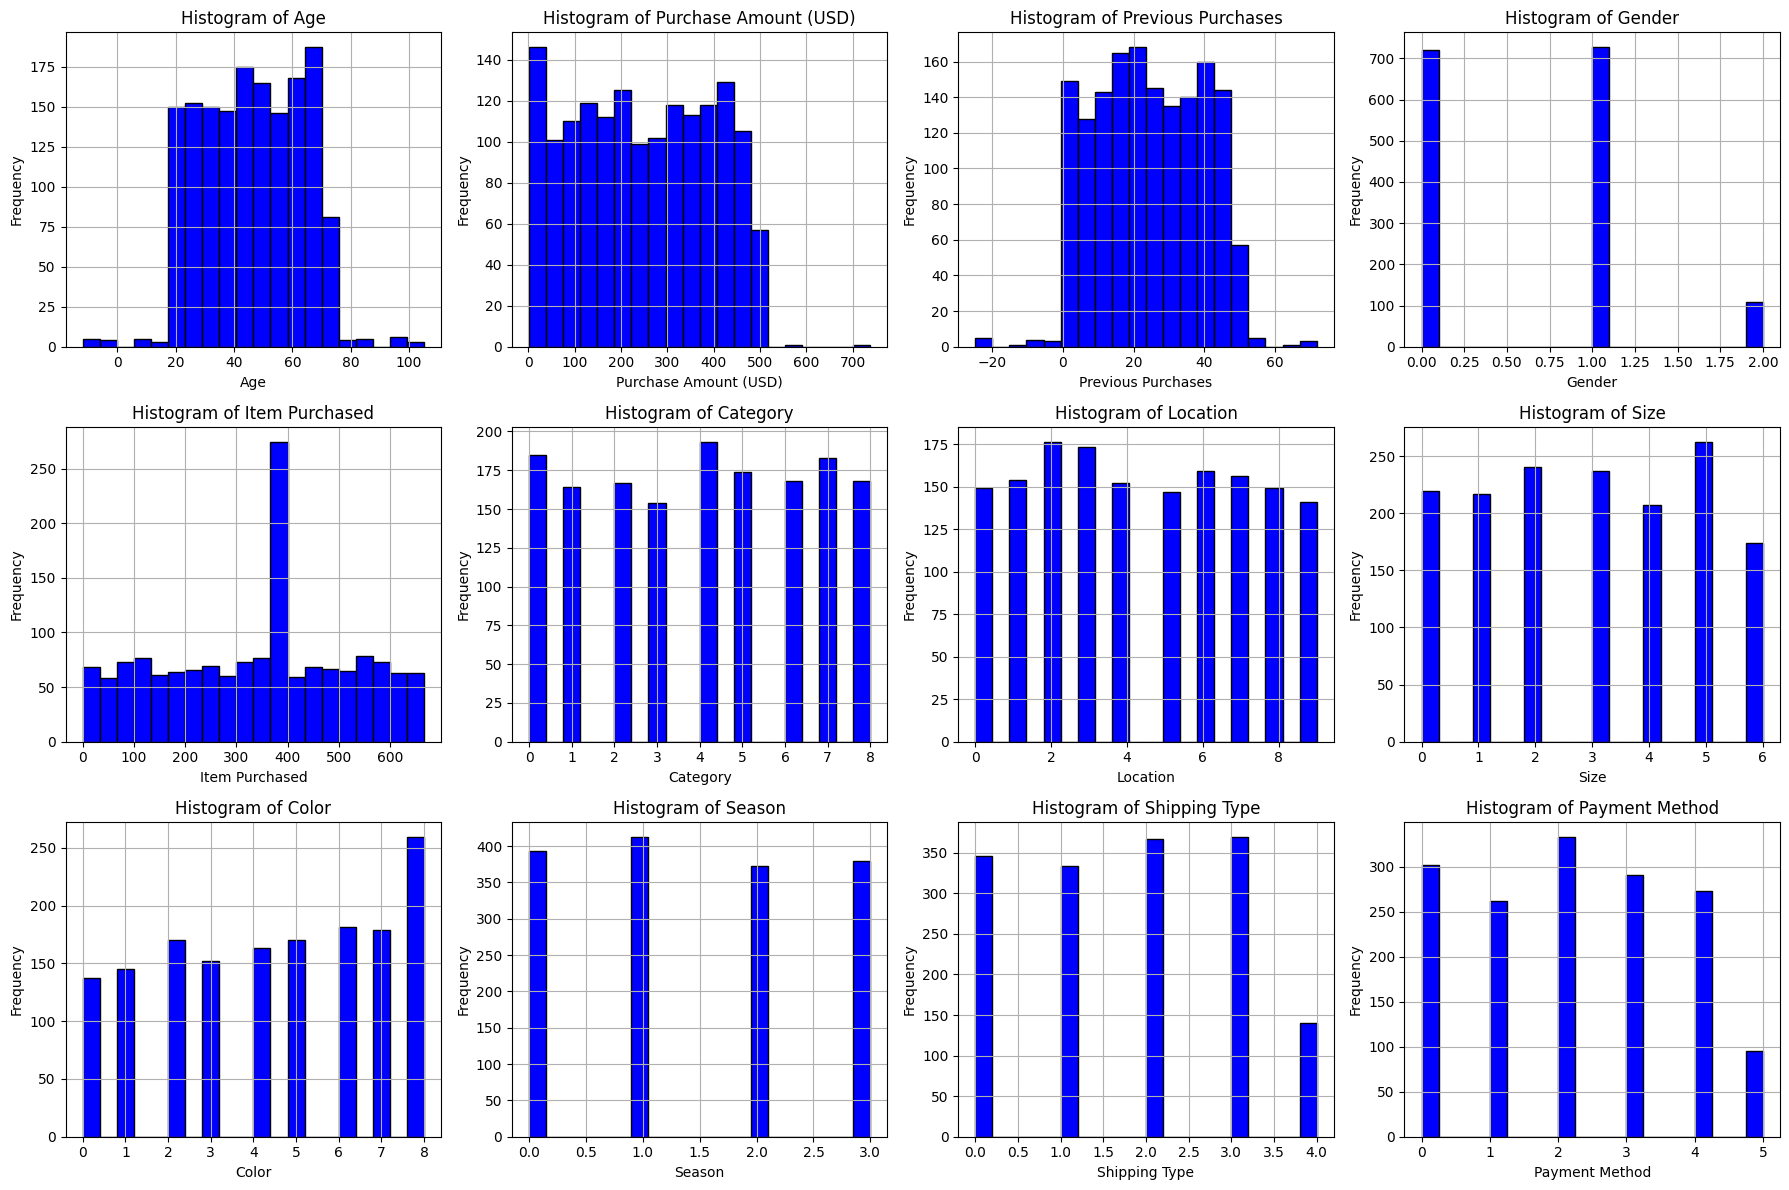

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer  # Import KNN Imputer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling

# Load the dataset
customer_shopping_trends = pd.read_csv('comprehensive_customer_shopping_trends.csv')

# Check the data
print(customer_shopping_trends.info())

# Remove outliers using the IQR method for specific columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter rows within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Handle outliers for specific columns
columns_to_check = ['Purchase Amount (USD)', 'Age', 'Previous Purchases']
for column in columns_to_check:
    customer_shopping_trends = remove_outliers(customer_shopping_trends, column)

# Target variable 'Frequency of Purchases' mapping
target_mapping = {'Weekly': 0, 'Fortnightly': 1, 'Monthly': 2}
customer_shopping_trends['Frequency of Purchases'] = customer_shopping_trends['Frequency of Purchases'].map(target_mapping)

# Apply Label Encoding for categorical features
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Payment Method']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    customer_shopping_trends[col] = label_encoder.fit_transform(customer_shopping_trends[col].astype(str))

# Features and target separation
X = customer_shopping_trends.drop(columns=['Customer ID', 'Frequency of Purchases'])
y = customer_shopping_trends['Frequency of Purchases']

# Handle missing values using KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
X_imputed = knn_imputer.fit_transform(X)  # Impute missing values

# Convert the imputed data back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Stratified Train-Test Split (with class balancing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance by computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# XGBoost Model with class weights
xg_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, scale_pos_weight=class_weight_dict.get(1, 1))  # Example for adjusting scale for class 1
xg_clf.fit(X_train, y_train, sample_weight=[class_weight_dict.get(label, 1) for label in y_train])

# Predict and evaluate
y_pred = xg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Weekly', 'Fortnightly', 'Monthly'], yticklabels=['Weekly', 'Fortnightly', 'Monthly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob = xg_clf.predict_proba(X_test)

# For multi-class, we can plot ROC for each class
for i in range(3):  # Since we have 3 classes
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc = roc_auc_score((y_test == i).astype(int), y_pred_prob[:, i])  # One-vs-Rest AUC
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Weekly', 'Fortnightly', 'Monthly']))

# Plot histograms for numerical features
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Gender', 'Item Purchased', 'Category',
                     'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Payment Method']

# Create subplots: 3 rows and 4 columns for histograms
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))  # 3 rows, 4 columns for histograms
axes = axes.flatten()  # Flatten the 2D array to make it easier to iterate over

# Plot histograms for numerical features
for i, col in enumerate(numerical_columns):
    axes[i].hist(customer_shopping_trends[col], bins=20, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


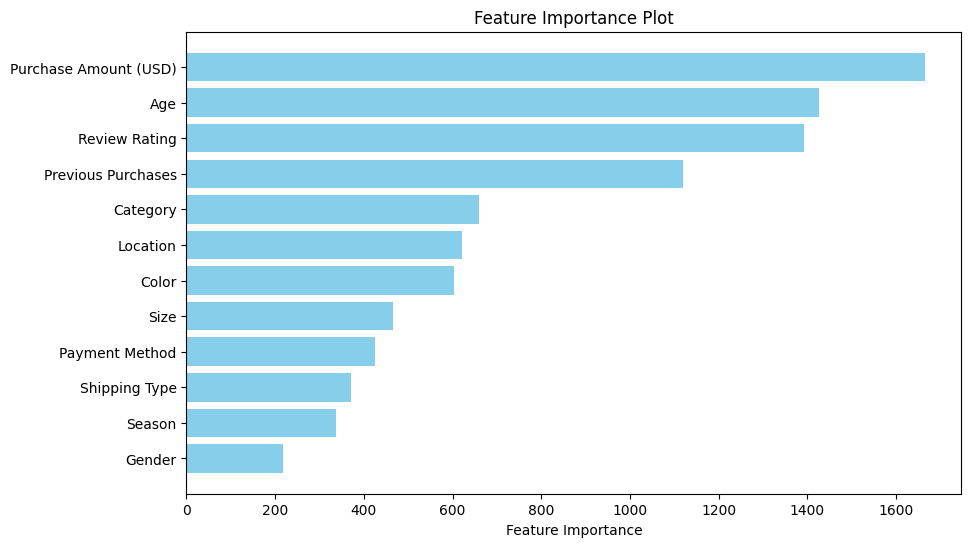

In [ ]:
# Feature Importance Plot
def plot_feature_importance(model, feature_names):
    # Get the feature importance (can also use 'gain' or 'cover' depending on what you prefer)
    feature_importance = model.get_booster().get_score(importance_type='weight')  # You can change 'weight' to 'gain' or 'cover'

    # Sort the features by importance
    sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    # Unzip the sorted importance
    features, importance_scores = zip(*sorted_feature_importance)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance_scores, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance Plot')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.show()

# Plot feature importance after training the model
plot_feature_importance(xg_clf, X.columns)


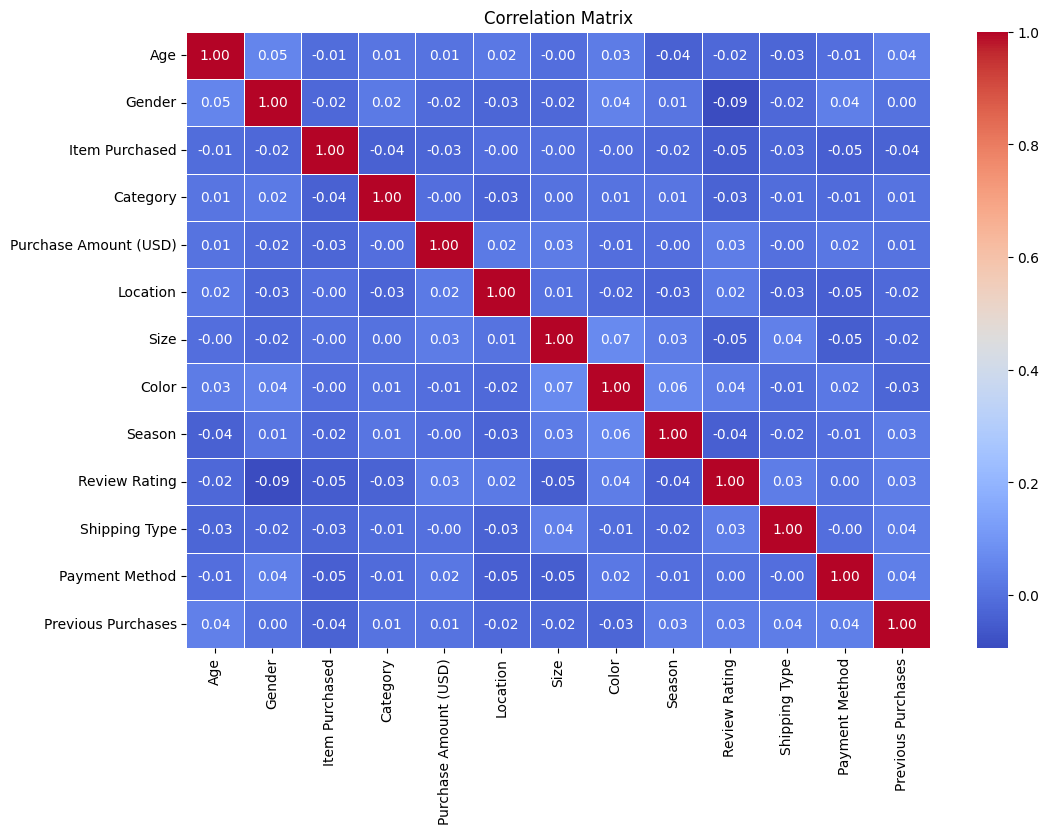

In [ ]:
# Correlation Matrix
corr_matrix = X_imputed.corr()  # Compute the correlation matrix for the features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


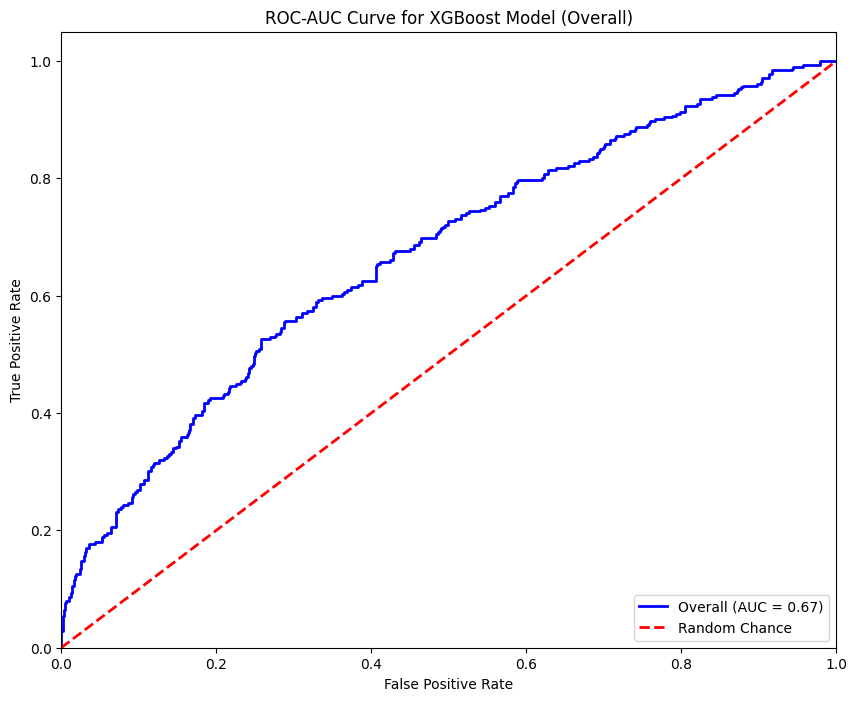

Overall ROC AUC: 0.6690


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class (One-vs-Rest strategy)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming there are 3 classes: 0, 1, 2

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the overall ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_micro, tpr_micro, color='blue', lw=2, label=f'Overall (AUC = {roc_auc_micro:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Chance')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for XGBoost Model (Overall)')
plt.legend(loc="lower right")

# Show the plot
plt.show()

# Print the overall ROC AUC
print(f"Overall ROC AUC: {roc_auc_micro:.4f}")


# **AFTER DATA PREPROCESSING**

In [ ]:
# Check the number of duplicates in each column
for column in customer_shopping_trends.columns:
    duplicate_count = customer_shopping_trends[column].duplicated().sum()  # Count duplicates in the column
    if duplicate_count > 0:
        print(f"Number of duplicates in column '{column}': {duplicate_count}")


Number of duplicates in column 'Customer ID': 113
Number of duplicates in column 'Age': 1285
Number of duplicates in column 'Gender': 1444
Number of duplicates in column 'Item Purchased': 773
Number of duplicates in column 'Category': 1438
Number of duplicates in column 'Purchase Amount (USD)': 46
Number of duplicates in column 'Location': 1437
Number of duplicates in column 'Size': 1440
Number of duplicates in column 'Color': 1438
Number of duplicates in column 'Season': 1443
Number of duplicates in column 'Review Rating': 1405
Number of duplicates in column 'Shipping Type': 1442
Number of duplicates in column 'Payment Method': 1441
Number of duplicates in column 'Previous Purchases': 1302
Number of duplicates in column 'Frequency of Purchases': 1444


In [ ]:
# Check for duplicate rows in the dataframe
duplicate_rows = customer_shopping_trends[customer_shopping_trends.duplicated()]

# Print the number of duplicate rows and display them
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [ ]:
# Check missing values before and after preprocessing
def check_missing_values(df, stage):
    print(f"Missing values after {stage}:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\nTotal missing values:", missing_values.sum())
    print("=" * 50)

# Initial check for missing values
check_missing_values(customer_shopping_trends, "initial loading")

# After KNN imputation (convert to DataFrame for compatibility)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
check_missing_values(X_imputed_df, "KNN imputation")


Missing values after initial loading:
Age                       74
Item Purchased           255
Purchase Amount (USD)    112
Review Rating            368
dtype: int64

Total missing values: 809
Missing values after KNN imputation:
Series([], dtype: int64)

Total missing values: 0


<Figure size 1000x600 with 0 Axes>

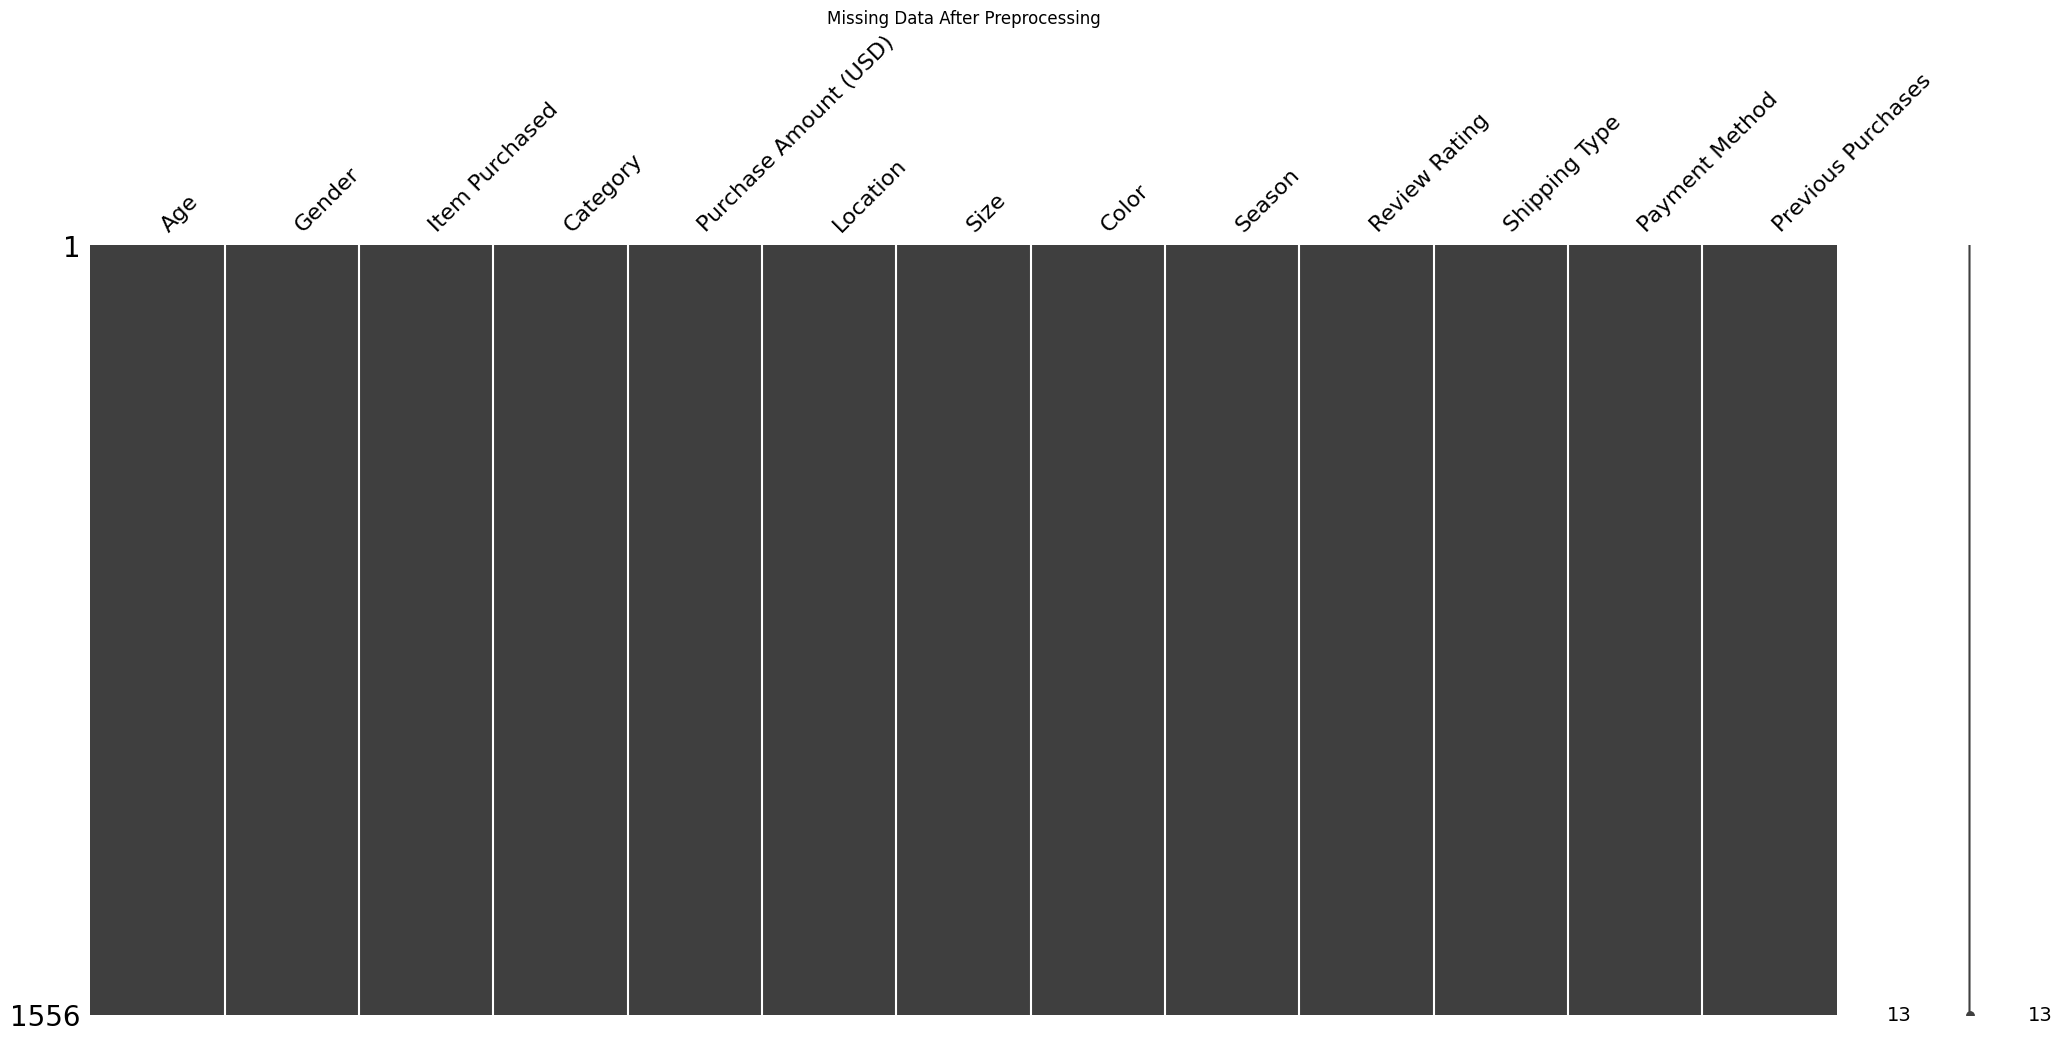

In [ ]:
import missingno as msno  # Import missingno

# Visualize missing values after preprocessing (imputation)
plt.figure(figsize=(10, 6))
msno.matrix(X_imputed)
plt.title('Missing Data After Preprocessing')
plt.show()



Box plots AFTER outlier removal:


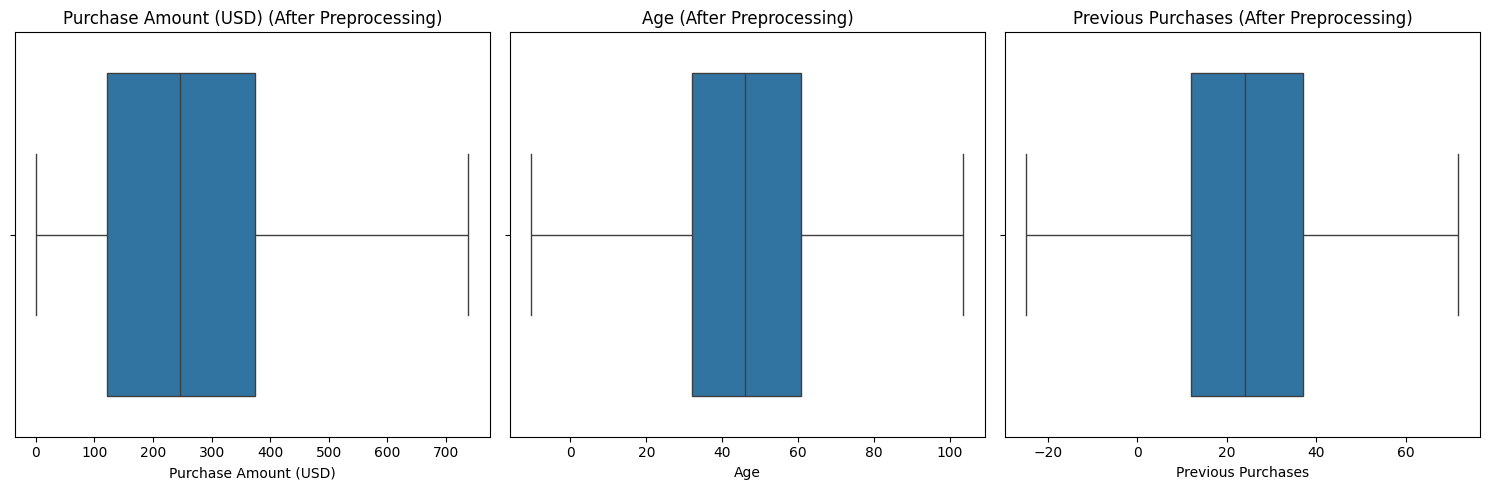

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create horizontal box plots for specified columns
def plot_boxplots(df, columns, stage):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(data=df, x=column)  # Use x for horizontal boxplots
        plt.title(f"{column} ({stage})")
        plt.xlabel(column)  # Label the x-axis for horizontal boxplots
        plt.ylabel("")  # Remove the y-axis label
    plt.tight_layout()
    plt.show()

# Columns with outliers
columns_with_outliers = ['Purchase Amount (USD)', 'Age','Previous Purchases']

# Box plots after preprocessing
print("\nBox plots AFTER outlier removal:")
plot_boxplots(customer_shopping_trends, columns_with_outliers, "After Preprocessing")


In [ ]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import base64
from io import BytesIO

# Initialize the Dash app
app = dash.Dash(__name__)

# Function to load image from Google Colab upload
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode()
    return f"data:image/png;base64,{encoded_image}"

# Define paths for your images
boxplot_path1 = '/content/drive/MyDrive/project ds/BOXPLOTBEFOREDP.png'
boxplot_path2 = '/content/drive/MyDrive/project ds/BOXPLOTAFTERDP.png'
classification_report_path1 = '/content/drive/MyDrive/project ds/CLASSIFICATIONREPORTBEFOREDP.PNG'
classification_report_path2 = '/content/drive/MyDrive/project ds/CLASSIFICATIONREPORTAFTERDP.PNG'
confusion_matrix_path1 = '/content/drive/MyDrive/project ds/CONFUSIONMARTIXBEFOREDP.png'
confusion_matrix_path2 = '/content/drive/MyDrive/project ds/CONFUSIONMARTIXAFTERDP.png'
correlation_matrix_path1 = '/content/drive/MyDrive/project ds/COORELATIONMATRIXAFTERDP.png'
correlation_matrix_path2 = '/content/drive/MyDrive/project ds/COORELATIONMATRIXAFTERDP.png'
histogram_path1 = '/content/drive/MyDrive/project ds/HISTOGRAMBEFOREDP.png'
histogram_path2 = '/content/drive/MyDrive/project ds/HISTOGRAMBEFOREDP.png'
missingno_path1 = '/content/drive/MyDrive/project ds/MISSINGNOBEFOREDP.png'
missingno_path2 = '/content/drive/MyDrive/project ds/MISSINGNOAFTERDP.png'
roc_auc_curve_predicted_path1 = '/content/drive/MyDrive/project ds/ROCOVERBEFOREDP.png'
roc_auc_curve_predicted_path2 = '/content/drive/MyDrive/project ds/ROCOVERAFTEREDP.png'
roc_auc_curve_individual_path1 = '/content/drive/MyDrive/project ds/ROCOVERBEFOREDP.png'
roc_auc_curve_individual_path2 = '/content/drive/MyDrive/project ds/ROCAFTERDP.png'
feature_importance_path1 = '/content/drive/MyDrive/project ds/FEATUREBEFOREDP.png'
feature_importance_path2 = '/content/drive/MyDrive/project ds/FEATUREAFTERDP.png'

# Encode images to base64
encoded_boxplot1 = encode_image(boxplot_path1)
encoded_boxplot2 = encode_image(boxplot_path2)
encoded_classification_report1 = encode_image(classification_report_path1)
encoded_classification_report2 = encode_image(classification_report_path2)
encoded_confusion_matrix1 = encode_image(confusion_matrix_path1)
encoded_confusion_matrix2 = encode_image(confusion_matrix_path2)
encoded_correlation_matrix1 = encode_image(correlation_matrix_path1)
encoded_correlation_matrix2 = encode_image(correlation_matrix_path2)
encoded_histogram1 = encode_image(histogram_path1)
encoded_histogram2 = encode_image(histogram_path2)
encoded_missingno1 = encode_image(missingno_path1)
encoded_missingno2 = encode_image(missingno_path2)
encoded_roc_auc_curve_predicted1 = encode_image(roc_auc_curve_predicted_path1)
encoded_roc_auc_curve_predicted2 = encode_image(roc_auc_curve_predicted_path2)
encoded_roc_auc_curve_individual1 = encode_image(roc_auc_curve_individual_path1)
encoded_roc_auc_curve_individual2 = encode_image(roc_auc_curve_individual_path2)
encoded_feature_importance1 = encode_image(feature_importance_path1)
encoded_feature_importance2 = encode_image(feature_importance_path2)

# Layout of the dashboard
app.layout = html.Div(
    style={'backgroundColor': '#f7f7f7', 'fontFamily': 'Arial, sans-serif', 'padding': '20px'},
    children=[
        html.H1("Before and After Preprocessing Dashboard", style={'textAlign': 'center', 'color': '#3d3d3d'}),

        # Dropdown to select which plot to view
        dcc.Dropdown(
            id='plot-selector',
            options=[
                {'label': 'Boxplot (Before vs After)', 'value': 'boxplot'},
                {'label': 'Classification Report (Before vs After)', 'value': 'classification_report'},
                {'label': 'Confusion Matrix (Before vs After)', 'value': 'confusion_matrix'},
                {'label': 'Correlation Matrix (Before vs After)', 'value': 'correlation_matrix'},
                {'label': 'Histogram (Before vs After)', 'value': 'histogram'},
                {'label': 'ROC AUC Curve (Predicted vs Actual)', 'value': 'roc_auc_curve_predicted'},
                {'label': 'Feature Importance (Before vs After)', 'value': 'feature_importance'},
            ],
            value='boxplot',  # default selected plot
            multi=False,  # single selection
            style={'width': '50%', 'margin': '20px auto'}
        ),

        # Section to display selected plot
        html.Div(id='plot-display'),

    ]
)

# Callback to update plot based on selection
@app.callback(
    dash.dependencies.Output('plot-display', 'children'),
    [dash.dependencies.Input('plot-selector', 'value')]
)
def update_plot(selected_plot):
    if selected_plot == 'boxplot':
        return html.Div([
            html.H3("Boxplot (Before vs After)", style={'color': '#444'}),
            html.Img(src=encoded_boxplot1, style={'width': '100%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_boxplot2, style={'width': '100%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])
    elif selected_plot == 'classification_report':
        return html.Div([
            html.H3("Classification Report (Before vs After)", style={'color': '#444'}),
            html.Img(src=encoded_classification_report1, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_classification_report2, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])
    elif selected_plot == 'confusion_matrix':
        return html.Div([
            html.H3("Confusion Matrix (Before vs After)", style={'color': '#444'}),
            html.Img(src=encoded_confusion_matrix1, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_confusion_matrix2, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])
    elif selected_plot == 'correlation_matrix':
        return html.Div([
            html.H3("Correlation Matrix (Before vs After)", style={'color': '#444'}),
            html.Img(src=encoded_correlation_matrix1, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_correlation_matrix2, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])
    elif selected_plot == 'histogram':
        return html.Div([
            html.H3("Histogram (Before vs After)", style={'color': '#444'}),
            html.Img(src=encoded_histogram1, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_histogram2, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])
    elif selected_plot == 'roc_auc_curve_predicted':
        return html.Div([
            html.H3("ROC AUC Curve (Predicted vs Actual)", style={'color': '#444'}),
            html.Img(src=encoded_roc_auc_curve_predicted1, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_roc_auc_curve_predicted2, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])
    elif selected_plot == 'feature_importance':
        return html.Div([
            html.H3("Feature Importance (Before vs After)", style={'color': '#444'}),
            html.Img(src=encoded_feature_importance1, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
            html.Img(src=encoded_feature_importance2, style={'width': '30%', 'borderRadius': '8px', 'boxShadow': '0 4px 8px rgba(0,0,0,0.1)', 'transition': 'transform 0.3s'}),
        ])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>